In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import StandardScaler, scale

# Standard Scaler

In [4]:
df = pd.read_csv('02/demos/datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

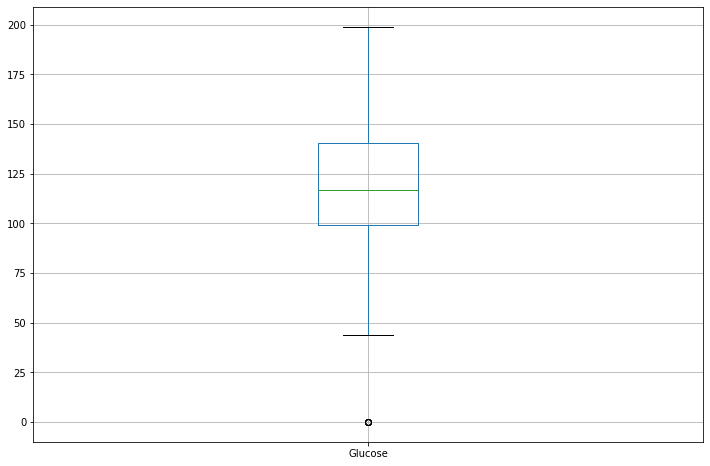

<AxesSubplot:>

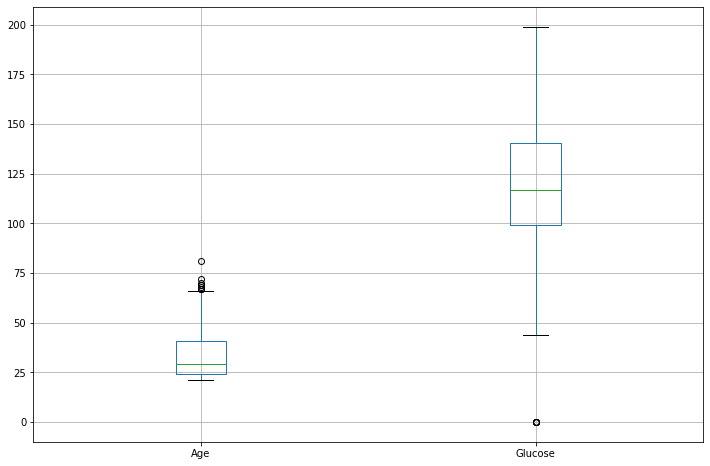

In [10]:
df.boxplot(column=['Age','Glucose'], figsize=(12,8))

In [11]:
outcome = df['Outcome']
df = df.drop(['Outcome'], axis=1)

<AxesSubplot:>

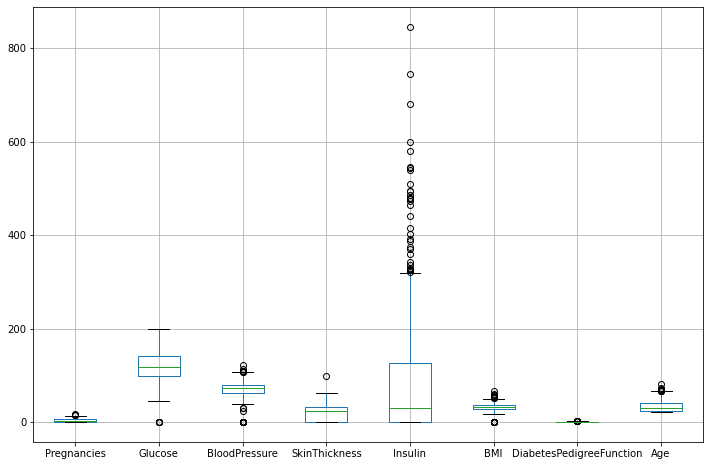

In [15]:
df.boxplot(figsize=(12,8))

<AxesSubplot:>

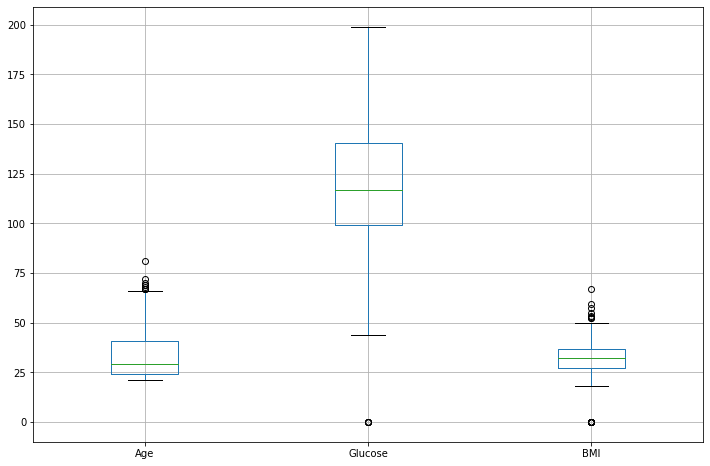

In [14]:
df.boxplot(column=['Age','Glucose','BMI'], figsize=(12,8))

In [16]:
manually_scaled_df = pd.DataFrame()

In [17]:
manually_scaled_df['Age'] = (df['Age'] - np.mean(df['Age'].values))/ np.std(df['Age'].values)
manually_scaled_df['Glucose'] = (df['Glucose'] - np.mean(df['Glucose'].values))/ np.std(df['Glucose'].values)
manually_scaled_df['BMI'] = (df['BMI'] - np.mean(df['BMI'].values))/ np.std(df['BMI'].values)

In [19]:
manually_scaled_df.describe()

,Age,Glucose,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.857600e-16,3.614007e-18,2.295979e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.041549e+00,-3.783654e+00,-4.060474e+00
25%,-7.862862e-01,-6.852363e-01,-5.955785e-01
50%,-3.608474e-01,-1.218877e-01,9.419788e-04
75%,6.602056e-01,6.057709e-01,5.847705e-01
max,4.063716e+00,2.444478e+00,4.455807e+00


<AxesSubplot:>

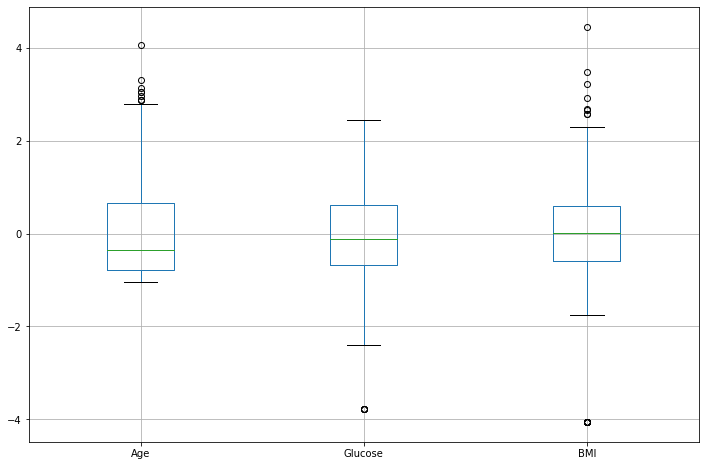

In [20]:
manually_scaled_df.boxplot(figsize=(12,8))

In [21]:
scaled_df = pd.DataFrame()

scaled_df['Glucose'] = scale(df['Glucose'])
scaled_df['BMI'] = scale(df['BMI'])
scaled_df['Age'] = scale(df['Age'])

In [22]:
scaled_df.describe()

,Glucose,BMI,Age
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.614007e-18,2.295979e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-4.060474e+00,-1.041549e+00
25%,-6.852363e-01,-5.955785e-01,-7.862862e-01
50%,-1.218877e-01,9.419788e-04,-3.608474e-01
75%,6.057709e-01,5.847705e-01,6.602056e-01
max,2.444478e+00,4.455807e+00,4.063716e+00


In [23]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_array = std_scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

<AxesSubplot:>

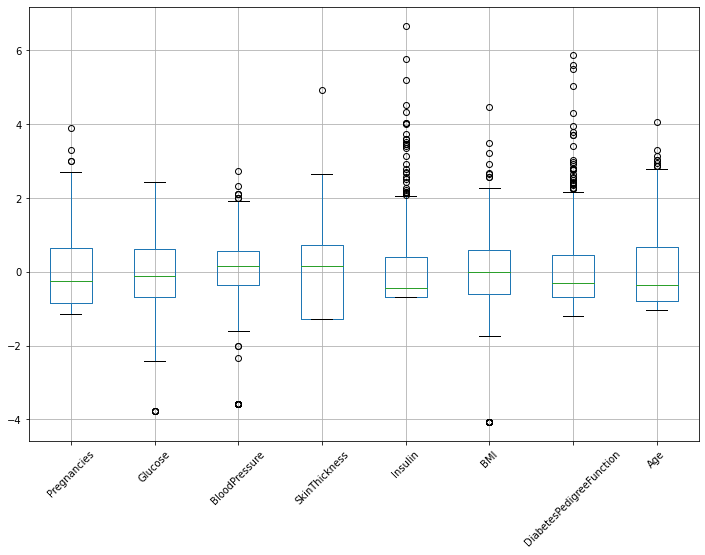

In [25]:
scaled_df.boxplot(figsize=(12,8), rot=45)

In [26]:
std_scaler.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [27]:
std_scaler.var_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [28]:
std_scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [29]:
std_scaler.n_samples_seen_

768

In [30]:
scaled_df['Outcome'] = outcome

In [31]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


# Robust Scaler

Use robust scaler in the presence of outliers

Uses median instead of mean and interquartile range instead of std

In [32]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

In [33]:
robust_scaled_df = pd.DataFrame(robust_scale(df), columns=df.columns)

In [34]:
robust_scaled_df[['Glucose', 'BMI', 'Age']].describe()

,Glucose,BMI,Age
count,768.000000,768.000000,768.000000
mean,0.094413,-0.000798,0.249464
std,0.775094,0.847759,0.691778
min,-2.836364,-3.440860,-0.470588
25%,-0.436364,-0.505376,-0.294118
50%,0.000000,0.000000,0.000000
75%,0.563636,0.494624,0.705882
max,1.987879,3.774194,3.058824


<AxesSubplot:>

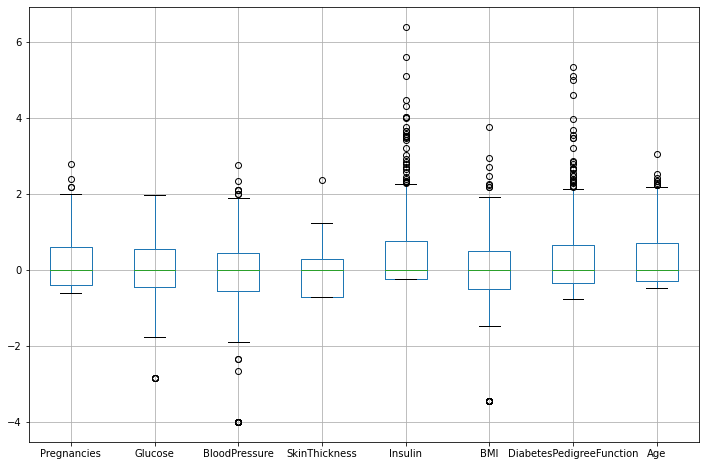

In [36]:
robust_scaled_df.boxplot(figsize=(12,8))

In [37]:
robust_scaler = RobustScaler(copy=True, with_centering=True, with_scaling=True)

In [38]:
robust_scaled_array = robust_scaler.fit_transform(df)
robust_scaled_df = pd.DataFrame(robust_scaled_array, columns=df.columns)

<AxesSubplot:>

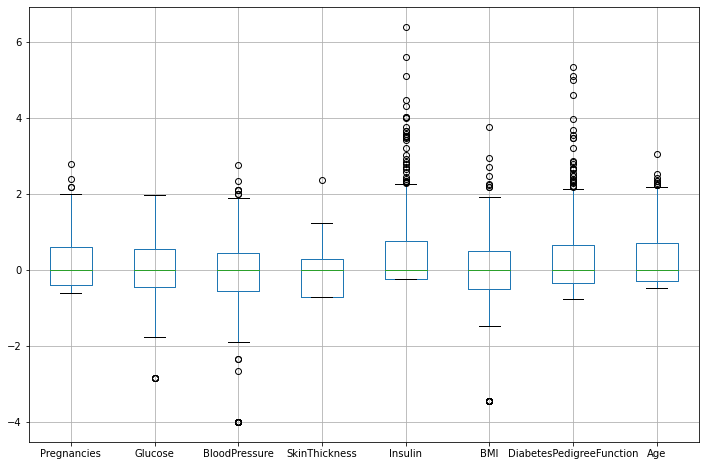

In [39]:
robust_scaled_df.boxplot(figsize=(12,8))

# Normalization and Cosine Similarity

Such that the feature vector has unit norm (magnitude).

L1 norm - sum of absolute values (for the same row)

L2 norm - square root of the sum of the squares of  values (for the same row) - used for cosine similarity calculations

max norm - max of values


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer, normalize

In [41]:
l2_normalized_df = pd.DataFrame(normalize(df, norm='l2'), columns=df.columns)

In [42]:
l2_normalized_df.iloc[0].pow(2)

Pregnancies                 0.001126
Glucose                     0.684963
BloodPressure               0.162110
SkinThickness               0.038307
Insulin                     0.000000
BMI                         0.035304
DiabetesPedigreeFunction    0.000012
Age                         0.078178
Name: 0, dtype: float64

In [43]:
math.sqrt(l2_normalized_df.iloc[0].pow(2).sum())

1.0

In [44]:
l1_normalized_df = pd.DataFrame(normalize(df, norm='l1'), columns=df.columns)

In [45]:
l1_normalized_df.iloc[0].abs().sum()

0.9999999999999998

In [46]:
max_normalized_df = pd.DataFrame(normalize(df, norm='max'), columns=df.columns)
max_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.040541,1.000000,0.486486,0.236486,0.0,0.227027,0.004236,0.337838
1,0.011765,1.000000,0.776471,0.341176,0.0,0.312941,0.004129,0.364706
2,0.043716,1.000000,0.349727,0.000000,0.0,0.127322,0.003672,0.174863
3,0.010638,0.946809,0.702128,0.244681,1.0,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.0,0.256548,0.013619,0.196429


In [47]:
df.iloc[[8,10,11]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,543,30.5,0.158,53
10,4,110,92,0,0,37.6,0.191,30
11,10,168,74,0,0,38.0,0.537,34


In [48]:
cosine_similarity(df.iloc[10].values.reshape(1,-1), df.iloc[11].values.reshape(1,-1))

array([[0.96221582]])

In [49]:
cosine_similarity(df.iloc[8].values.reshape(1,-1), df.iloc[10].values.reshape(1,-1))

array([[0.34751949]])

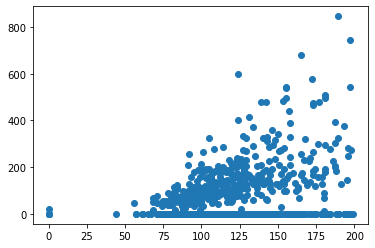

In [50]:
plt.scatter(df['Glucose'], df['Insulin'])

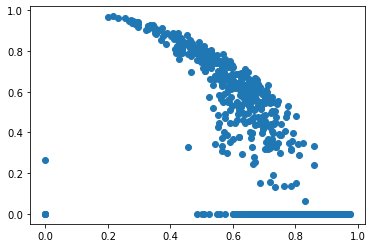

In [51]:
plt.scatter(l2_normalized_df['Glucose'], l2_normalized_df['Insulin'])

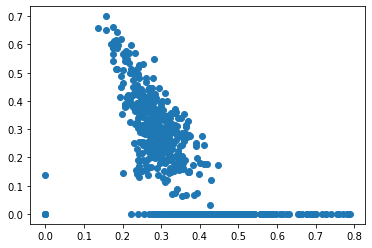

In [52]:
plt.scatter(l1_normalized_df['Glucose'], l1_normalized_df['Insulin'])

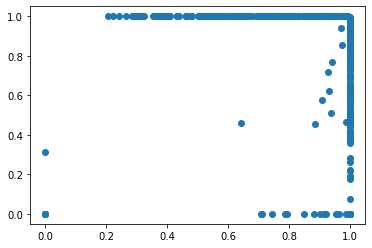

In [53]:
plt.scatter(max_normalized_df['Glucose'], max_normalized_df['Insulin'])

# Transforming Data to normal distribuition using quantile transformer

Its a non linear trasformation and may destroy non linear relations between the variables

In [3]:
store_visits = pd.read_csv('02/demos/datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
168,1105.805286,5547.026428,1
265,531.138175,515.305041,0
78,906.428091,4535.140455,1
243,524.272772,675.659996,0
266,586.075347,661.296788,0
50,931.868154,4671.340773,1
207,482.111945,667.889033,0
7,856.564284,4305.821421,1
114,1006.490283,5079.451413,1
299,410.115868,770.883724,0


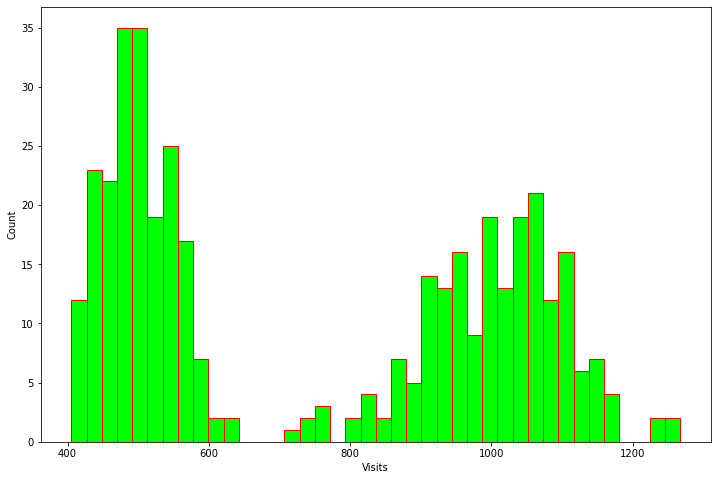

In [5]:
fig, ax = plt.subplots(figsize=(12,8))

plt.hist(store_visits['Visits'],
         facecolor = 'lime',
         edgecolor = 'red',
         bins = 40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

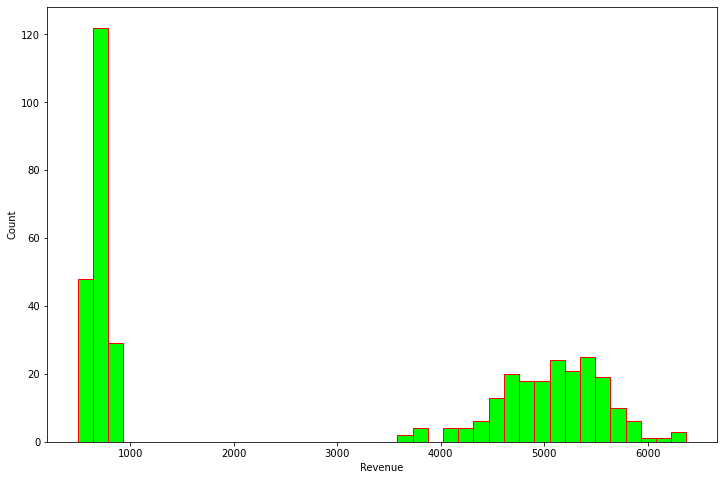

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

plt.hist(store_visits['Revenue'],
         facecolor = 'lime',
         edgecolor = 'red',
         bins = 40)

plt.xlabel('Revenue')
plt.ylabel('Count')

plt.show()

In [9]:
from sklearn.preprocessing import QuantileTransformer
transform = QuantileTransformer(output_distribution='normal', n_quantiles=200)
store_transform = transform.fit_transform(store_visits[['Visits', 'Revenue']])

In [10]:
store_transform = pd.DataFrame(data = store_transform, columns = ['Visits_transform', 'Revenue_transform'])

store_transform.head()

,Visits_transform,Revenue_transform
0,0.689662,0.733025
1,0.990498,0.989974
2,0.315277,0.334061
3,0.370619,0.426712
4,1.221233,1.245011


In [11]:
final_df = pd.concat([store_visits, store_transform], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.689662,0.733025
1,1058.607260,5349.036298,1,0.990498,0.989974
2,935.069491,4756.347453,1,0.315277,0.334061
3,952.360965,4849.804826,1,0.370619,0.426712
4,1078.384010,5467.920052,1,1.221233,1.245011


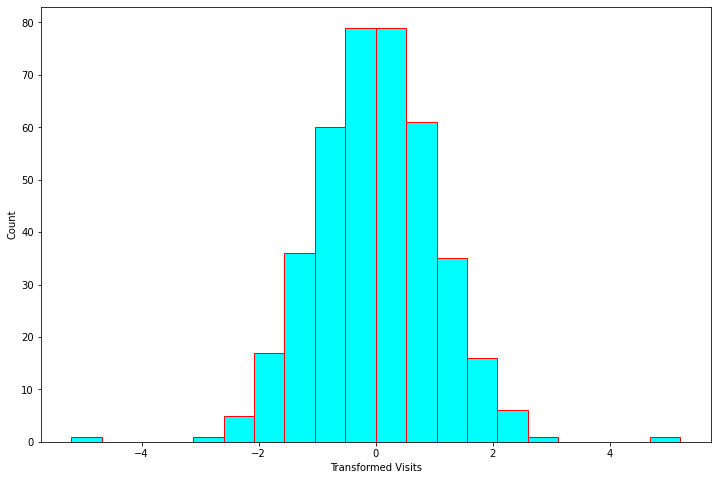

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

plt.hist(final_df['Visits_transform'],
         facecolor = 'cyan',
         edgecolor = 'red',
         bins = 20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')

plt.show()

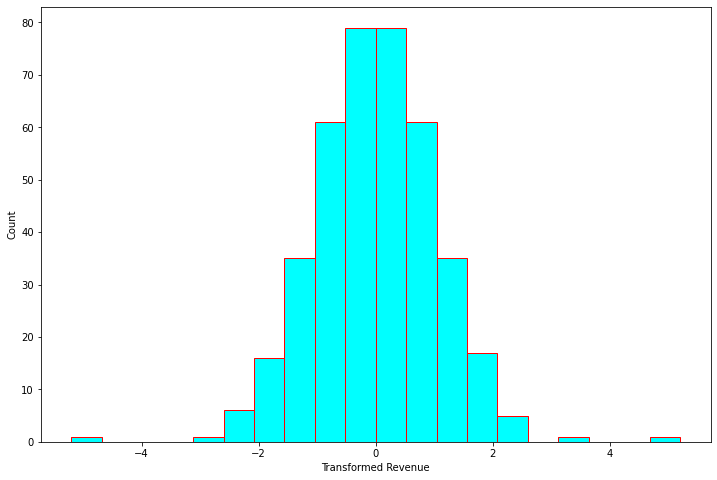

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

plt.hist(final_df['Revenue_transform'],
         facecolor = 'cyan',
         edgecolor = 'red',
         bins = 20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')

plt.show()

# SVD

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [17]:
df = pd.read_csv('02/demos/datasets/diabetes_processed.csv')


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [19]:
FEATURES = list(df.columns[:-1])
FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [20]:
LABEL='Outcome'

In [21]:
def build_model(n_coponents):
    X = df[FEATURES]
    Y = df[LABEL]

    fa_obj = FactorAnalysis(n_components=n_coponents,
                            random_state=10,
                            max_iter=10000)
    
    x_new = fa_obj.fit_transform(X, Y)
    X = pd.DataFrame(x_new)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    model = LogisticRegression(solver='liblinear', max_iter=1000)

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {'fact_a_obj': fa_obj,
            'transform': X,
            'accuracy': acc,
            'precision': prec,
            'recall': recall}

In [22]:
def compare_results(result_dict):
    for key in result_dict:
        print('Test: ', key)

        print()
        print('accuracy_score: ', result_dict[key]['accuracy'])
        print('precision_score: ', result_dict[key]['precision'])
        print('recall_score: ', result_dict[key]['recall'])


        print()



In [23]:
def visualize_results(result_dict):

    n_components = list(range(0,8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]


    plt.figure(figsize=(12,10))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')

    plt.xlabel('n coponents')
    plt.ylabel('score')

    plt.legend()

    plt.show()

In [27]:
result_dict = {}

for i in range(1,9):
    result_dict['n_components - '+ str(i)] = build_model(i)

In [28]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score:  0.6428571428571429
precision_score:  0.6666666666666666
recall_score:  0.19672131147540983

Test:  n_components - 2

accuracy_score:  0.7142857142857143
precision_score:  0.7575757575757576
recall_score:  0.4098360655737705

Test:  n_components - 3

accuracy_score:  0.7077922077922078
precision_score:  0.625
recall_score:  0.37735849056603776

Test:  n_components - 4

accuracy_score:  0.7597402597402597
precision_score:  0.75
recall_score:  0.5263157894736842

Test:  n_components - 5

accuracy_score:  0.7792207792207793
precision_score:  0.7142857142857143
recall_score:  0.5769230769230769

Test:  n_components - 6

accuracy_score:  0.7597402597402597
precision_score:  0.7021276595744681
recall_score:  0.5892857142857143

Test:  n_components - 7

accuracy_score:  0.7532467532467533
precision_score:  0.6666666666666666
recall_score:  0.5384615384615384

Test:  n_components - 8

accuracy_score:  0.7337662337662337
precision_score:  0.6829268292682

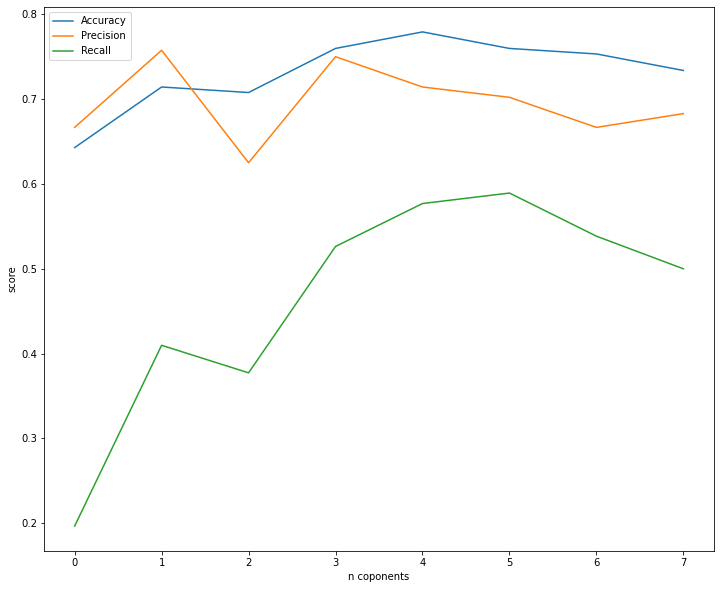

In [29]:
visualize_results(result_dict)